# **<span style='color:orange'>Preprocesamiento</span>**

### Aqui se realiza el análisis estadístico exploratorio y el preprocesamiento de los datos.

**El objetivo final es preparar el conjunto de datos para la aplicación de algoritmos de Machine Learning**

#### Exploración estadística 

In [1]:
#Importamos las herramientas necesarias

import numpy as np # funciones matemáticas
import pandas as pd # herramientas de analisis de datos
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns # Visualization
import matplotlib.pyplot as plt

In [2]:
#importamos los datos y los leemos con la función pd.read_excel.
#De ahora en adelante cada vez que declaremos df estaremos haciendo referencia a nuestros datos

df = pd.read_excel("./DATA/fragmentos.xlsx",sheet_name='encoded_int', engine='openpyxl')


In [3]:
df.info() #información básica  sobre el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Elemento            578 non-null    object
 1   Coccion             578 non-null    int64 
 2   T_desgrasante       578 non-null    int64 
 3   Composicion         578 non-null    int64 
 4   Densidad            578 non-null    int64 
 5   Textura             578 non-null    int64 
 6   Grosor₍mm)          578 non-null    int64 
 7   Tamaño(cm)          578 non-null    int64 
 8   Acabado_Interno     578 non-null    int64 
 9   Acabado_Externo     578 non-null    int64 
 10  Dureza              578 non-null    int64 
 11  Color_Munsell       578 non-null    object
 12  Ahumado             578 non-null    int64 
 13  Tecnica             578 non-null    int64 
 14  Elemento₁           578 non-null    int64 
 15  Localizacion        578 non-null    int64 
 16  Baño                578 no

Exploremos la información que el comando **df.info()** nos da:

* Tenemos 578 entradas que corresponden al número de fragmentos númerados en un indice del 0 al 577
* Tenemos un total de 22 columnas (numeradas de 0 a 21) que representan cada una de las caracteristicas con las que describimos los fragmentos.
* En esta tabla resúmen, la columna Non-Null count nos informa sobre el número de valores faltantes en cada columna. Como observamos no tenemos valores faltantes en nuestros datos 
* La columna Dtype nos informa sobre el tipo de datos que contiene nuestra matriz, los tipos **float64** y **int64** corresponden a tipos numéricos mientras que **object** se refiere a tipos categóricos. Como podemos observar la nuestra es una **matriz de datos mixta** 16 columnas son numéricas y 5 categóricas

**Ahora tenemos la tarea de convertir las columnas categóricas en numéricas y de simplificar tanto como sea posible nuestro espacio predictor, es decir eliminar algunas columnas que no son realmente importantes para la soulción de nuestro problema**

Antes de realizar cualquier procedimiento estadístico vamos a utilizar nuestra intuición para eleiminar aquellas variables que ya sabemos que nos van a causar problemas: el siguiente comando nos informa sobre los vlaores que componen la variables 'Elemento'. Como vemos todos los fragmentos pertenecen a la misma categoria 'cuerpo'y por lo tanto no nos aporta información que podamos usar para clasificar los fragmentos

In [6]:
df['Elemento'].value_counts()

cuerpo    578
Name: Elemento, dtype: int64

**No vamos a utilizar las variables relativas al color porque queremos reducir al maximo posible los sesgos producto de la percepción de los analístas. El color es muy susceptible de ser percibido de forma diferente d euna persona a otra asi que eliminaremos toda la información relativa al color de los fragmentos**

In [7]:
#eliminamos algunas columnas que no usaremos en nuestro ejercicio
df = df.drop(['Color_Eng _o_baño2','Elemento', 'Color_Baño', 'Color_Engobe', 'Color_Munsell'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Coccion          578 non-null    int64
 1   T_desgrasante    578 non-null    int64
 2   Composicion      578 non-null    int64
 3   Densidad         578 non-null    int64
 4   Textura          578 non-null    int64
 5   Grosor₍mm)       578 non-null    int64
 6   Tamaño(cm)       578 non-null    int64
 7   Acabado_Interno  578 non-null    int64
 8   Acabado_Externo  578 non-null    int64
 9   Dureza           578 non-null    int64
 10  Ahumado          578 non-null    int64
 11  Tecnica          578 non-null    int64
 12  Elemento₁        578 non-null    int64
 13  Localizacion     578 non-null    int64
 14  Baño             578 non-null    int64
 15  Engobe           578 non-null    int64
dtypes: int64(16)
memory usage: 72.4 KB


### Métodos para explorar la correlación y multicolinearidad entre las variables

Una vez eliminadas las columnas que **sabemos** que no nos sirven, vamos a usar dos procedimientos diferentes para intentar simplificar aún más nuestro problema

* [Matrices de correlación](https://es.wikipedia.org/wiki/Matriz_de_correlaci%C3%B3n)
* [Factor de inflación de la varianza](https://es.wikipedia.org/wiki/Factor_de_inflaci%C3%B3n_de_la_varianza)

Las matrices de correlación permiten una inspección visual intuitiva del comportamiento de las variables, veamos:

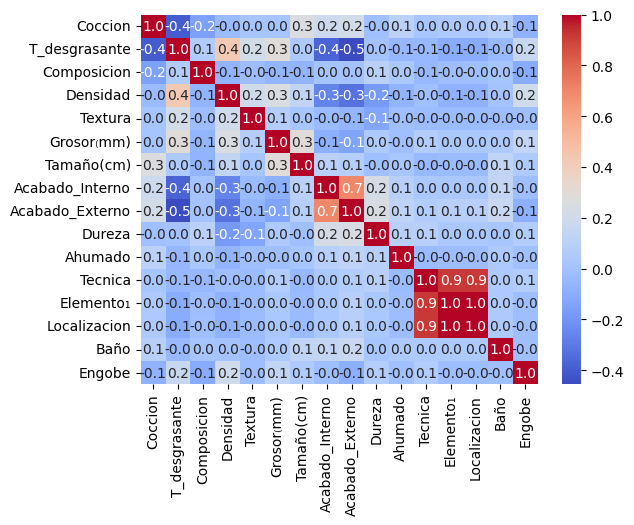

In [13]:
#Matrices de correlación

correlation_matrix = df.corr(method='spearman') #Mediante el parametro method= se puede escoger entre varios
                                                #coeficientes de correlación {‘pearson’,
                                                #‘kendall’, ‘spearman’}

sns_plot = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".1f") 
fig = sns_plot.get_figure()
#fig.savefig("./Un-modelo-de-juguete/figures/correlation.png", bbox_inches='tight')
plt.show()

In [8]:
# Vamos a construir una función para calcular el Factor de inflación de la varianza (VIF)

def calc_vif(df):
    # Calculando el VIF
    vif = pd.DataFrame() # creamos la tabla para visualizar los resultados
    vif["variables"] = df.columns # la columna 'variables' va a tener el nombre de las columnas de nuestra matriz
    vif["VIF"] = [variance_inflation_factor(df.values, i) 
                  for i in range(df.shape[1])] # calculamos el VIF para cada columna

    return(vif)

La intuición detras del computo del VIF es la eliminación de aquellas variables con puntajes muy altos, particularmente valores >= 10 indican una alta [multicolinealidad](https://es.wikipedia.org/wiki/Multicolinealidad).

Este es un ejercicio iterativo, es decir, Calculamos el VIF, eliminamos aquellas columans con el mayor valor y volvemos a calcular...

**[aqui](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/) un recurso útil para entender el funcionamiento de este método**

In [10]:
# Aplicamos la función que creamos sobre nuestros datos df
calc_vif(df)

,variables,VIF
0,Coccion,2.071162
1,T_desgrasante,6.463182
2,Composicion,3.754412
3,Densidad,1.793697
4,Textura,1.144007
5,Grosor₍mm),13.853238
6,Tamaño(cm),13.789016
7,Acabado_Interno,19.025090
8,Acabado_Externo,19.428129
9,Dureza,3.038163


In [6]:
df= df.drop(['Acabado_Externo', 'Acabado_Interno', 'Tamaño(cm)'], axis=1)
calc_vif(df)

,variables,VIF
0,Coccion,1.757735
1,T_desgrasante,6.151696
2,Composicion,3.442228
3,Densidad,1.717544
4,Textura,1.136609
5,Grosor₍mm),7.888702
6,Dureza,2.705256
7,Ahumado,1.198890
8,Tecnica,2.672943
9,Elemento₁,3.601514


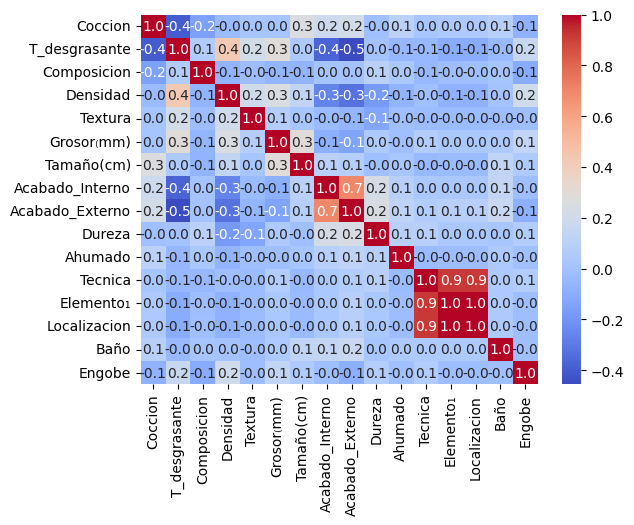

In [12]:
#Matrices de correlación

correlation_matrix = df.corr(method='spearman') #Mediante el parametro method= se puede escoger entre varios
                                                #coeficientes de correlación {‘pearson’,
                                                #‘kendall’, ‘spearman’}

sns_plot = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".1f") 
fig = sns_plot.get_figure()
#fig.savefig("/home/dsg/Escritorio/CCA2024/figures/correlation.png", bbox_inches='tight')
plt.show()

Los mapas de calor permiten la inspección visual de variables altamente correlacionadas.
Su exclusión del conjunto de datos debe estar justificada en términos del objetivo

In [16]:
df.to_csv('./intermediate_data/datos_preprocesados.csv')


Una vez los datos estan preprocesados, podemos realizar la [Fase No-Supervisada](./CCA_Clustering.ipynb)